# Diabetes Prediction
##### BBAN3001 Group Assignment
---

<!-- Paper by
| First Name    | Last Name     | E-Mail     |
|--------------|--------------|--------------|
| Elena| Schmidhuber| elenaasc@stud.ntnu.no|
| Natalie| Sporrer| natalbsp@stud.ntnu.no|
| Fabian| Rippel| fjrippel@stud.ntnu.no|
| Joachim| Haug| joachikh@stud.ntnu.no|
| Clemens| Büchter| clemenbu@stud.ntnu.no| -->
Dataset by [Kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data)

In our assignment, we will explore a dataset on diabetes risk factors, and use different business analytics approaches in order to predict the occurrence of diabetes and what indicators are the best ones. To understand the need for this kind of prediction models, we have to look at what diabetes is and its potential cost to society. Later we will describe our dataset and how we will use it in the analysis.

Before we go into what diabetes is, it is important to mention that our dataset is a refined version of responses from 2015 edition of The Behavioral Risk Factor Surveillance System (BRFSS). This is a health-related telephone survey, conducted annually by a national public health agency in the United States, the Centers for Disease Control and Prevention (CDC) (https://www.cdc.gov/brfss/). We will describe the dataset in more detail later.

Starting with the disease and its costs. Diabetes is a chronic disease, mainly characterized by elevated blood sugar levels (https://www.who.int/health-topics/diabetes#tab=tab_1). There are two types of diabetes, type 1 and type 2. Type 1 is the the type many know as “juvenile diabetes”, where your body produces too little or no insulin, and you are depentent on supplimenting insulin daily. Little is known as to the cause of this type, and the same goes for preventing type 1 diabetes (https://www.who.int/news-room/fact-sheets/detail/diabetes). 95% of all diabetes cases are type 2 which is more prevelant in adults, and is a result of your body becoming resistant to insulin. Type 2 diabetes can cause damage over time, especially since the symptoms often are less marked then those of type 1 diabetes, meaning complications can have risen before one is diagnose with the disease. Being a major cause of strokes, heart attacks, kidney failure, bildeness and even (lowe) limb amputation, preventing the disease (type 2) is important (https://www.who.int/news-room/fact-sheets/detail/diabetes). In addition the CDC, a national public health agency in the United States, describe a condition where blood sugar levels are elevated, but not high enough to be diagnosed as type 2 diabetes yet. This condition is prediabetes, and according to the CDC more than 1 in 3 americans have prediabetes, with a staggering 80% of those unaware of having this condition (https://www.cdc.gov/diabetes/basics/prediabetes.html). Apart from the individual health risk of diabetes, the disease can be costly for society. The CDC states that (in the U.S.) medical costs and the costs of lost work and wages due to diabetes is around 327 billion dollars (https://www.cdc.gov/diabetes/basics/quick-facts.html).

Moving on to the relevance of diabetes risk prediction models. Diabetes type 2 is in many cases preventable, and in the case of those who already have the disease the World Health Organization states that “Early Diagnosis is important to prevent the worst effects of type 2 diabetes” (https://www.who.int/news-room/fact-sheets/detail/diabetes). In our assignment we will therefore be using data and analytics to explore methods that can predict diabetes. In our analysis we will look at the correlation between various factors and diabetes as well as using logistic regression to predict the presence of diabetes. Furthermore we will visualize our data, discuss our findings and possible solutions and conclusions. The dataset we are using is as mentioned BRFSS from 2015, but with less feature variables.

### Table of content

1. Introduction
2. Descriptive Analysis of the Data
3. Visualization of the Data
4. Statistical Analysis and Results  
4.1 Unbalanced Dataset  
4.1.1 Correlation analysis    
4.1.2 Logistic Regression   
4.2 Balanced Dataset   
4.2.1 Correlation analysis    
4.2.2 Logistic Regression     
5. Discussion
6. Conclusion

## 1. Introduction

## 2. Descriptive analysis of the data

The dataset we are working with is from Kaggle, and contains three subsets (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/). The three subsets of data forming the Diebetes Health Indicators dataset are the following (all being csv files): diabetes _ 012 _ health _ indicators _ BRFSS2015 diabetes _ binary _ 5050split _ health _ indicators _ BRFSS2015 diabetes _ binary _ health _ indicators _ BRFSS2015 The dataset from Kaggle is as mentioned a modified version BRFSS 2015, where the amount of feature variables are reduced from 330 down to 21 as well as being cleaned. The original dataset (from the CDC) conatins 441 455 individual reponses, where our dataset (and the respective subsets) have 253 680, 70 692 and 253,680 reponses from the BRFSS 2015 respectively. The feature variables are both questions asked directly to those participating and calculations from responses to survey questions (https://www.cdc.gov/brfss/annual_data/2015/pdf/2015_Calculated_Variables_Version4_08_10_17-508c.pdf). Now lets take a closer look at the differences between our subsets.

The first subset and last subset are both unbalanced and have the same amount of survey reponses. The difference is the classification of the target variable, diabetes. In the first dataset the target vareble is Diabetes_012, which has the classes 0, 1 and 2. With 0 being no diabetes or only when pregnant, 1 is prediabetes and 2 is diabetes. In the last subset the target variable is binary, with 0 for no diabetes and 1 being prediabates and diabetes.

The second subset (5050split), is similar to the last subset with the target variable having the same binary classes. The difference is that this subset has 70 692 reponses which are equally split. 50% of the reponses answered no diabetes and the other 50% reponded having either prediabetes or diabetes.

In our analysis we will be using the two binary subsets, and we renamed the target variable from Diabetes_binary to Diabetes before our statistical analysis.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Loading the dataset
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

Our problem is to create a model to estimate weather a person has diabetes based on 21 independent variables. In the following we will briefly name all of these variables and explain some of them in more detail in the third chapter:

- HigbBP: High blood pressure indicator
- HighChol: High cholesterol level indicator
- CholCheck: Cholesterol check
- BMI: Body Mass Index
- Smoker: Smoking status
- Stroke: Stroke indicator
- HeartDiseaseorAttack: Heart disease or heart attack indicator
- PhysActivity: Physical activity indicator
- Fruits: Fruit consumption
- Veggies: Vegetable consumption
- HvyAlcoholConsump: Heavy alcohol consumption indicator
- AnyHealthcare: Healthcare access indicator
- NoDocbcCost: No doctor visit due to cost indicator
- GenHlth: General health status
- MentHlth: Mental health status beeing poor in the last 30 days
- PhysHlth: Physical health status beeing poor in the last 30 days
- DiffWalk: Difficulty in walking indicator
- Sex: Gender
- Age: Age category
- Education: Education level
- Income: Income category

 Our goal is to find the variables that have the greatest influence on a diabetic disease based on statistical assumptions. Then, using logistic regression, we want to build a model that will allow us to determine whether a person has diabetes or not.

In the following we are using some functions of the pandas package to describe our dataset:

In [49]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [50]:
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [ ]:
# renaming Diabtes_binary to Diabetes
df.rename(columns={'Diabetes_binary': 'Diabetes'}, inplace=True)

In [ ]:
# checking for the shape of the dataframe
df.shape

In [ ]:
# checking for the columns of the dataframe
df.columns

In [51]:
# describing the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [52]:
# checking for general information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

We can observe that all of the 21 independent variables correspond to the datatype float and there are no Objective datatypes. This means we do not have to change the datatype for any of the variables. To be able to work with the dataset, we now check our dataset for null values, unique values and duplicated rows. Furthermore we rename our dependent variable.

In [ ]:
# checking for null values
df.isnull().sum()

In [79]:
# convert all columns to ints   
df = df.astype(int)

In [ ]:
# checking for unique values in different variables

unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

In [ ]:
# checking duplicates rows in dataset df1 to eliminate them

duplicated_rows = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicated_rows))
duplicated_rows.head()

In [ ]:
# eliminating 24206 duplicate rows from the dataset
df.drop_duplicates(inplace = True)

In [ ]:
# checking shape after eliminating duplicate rows 
df.shape

## 3. Visualization of the data

In the third chapter, we delve into the visualization of the data, employing graphical representations to provide a clear and intuitive understanding of the dataset under examination. These visualizations offer a valuable lens through which to explore the underlying patterns and trends within the data, setting the stage for deeper insights in subsequent chapters.

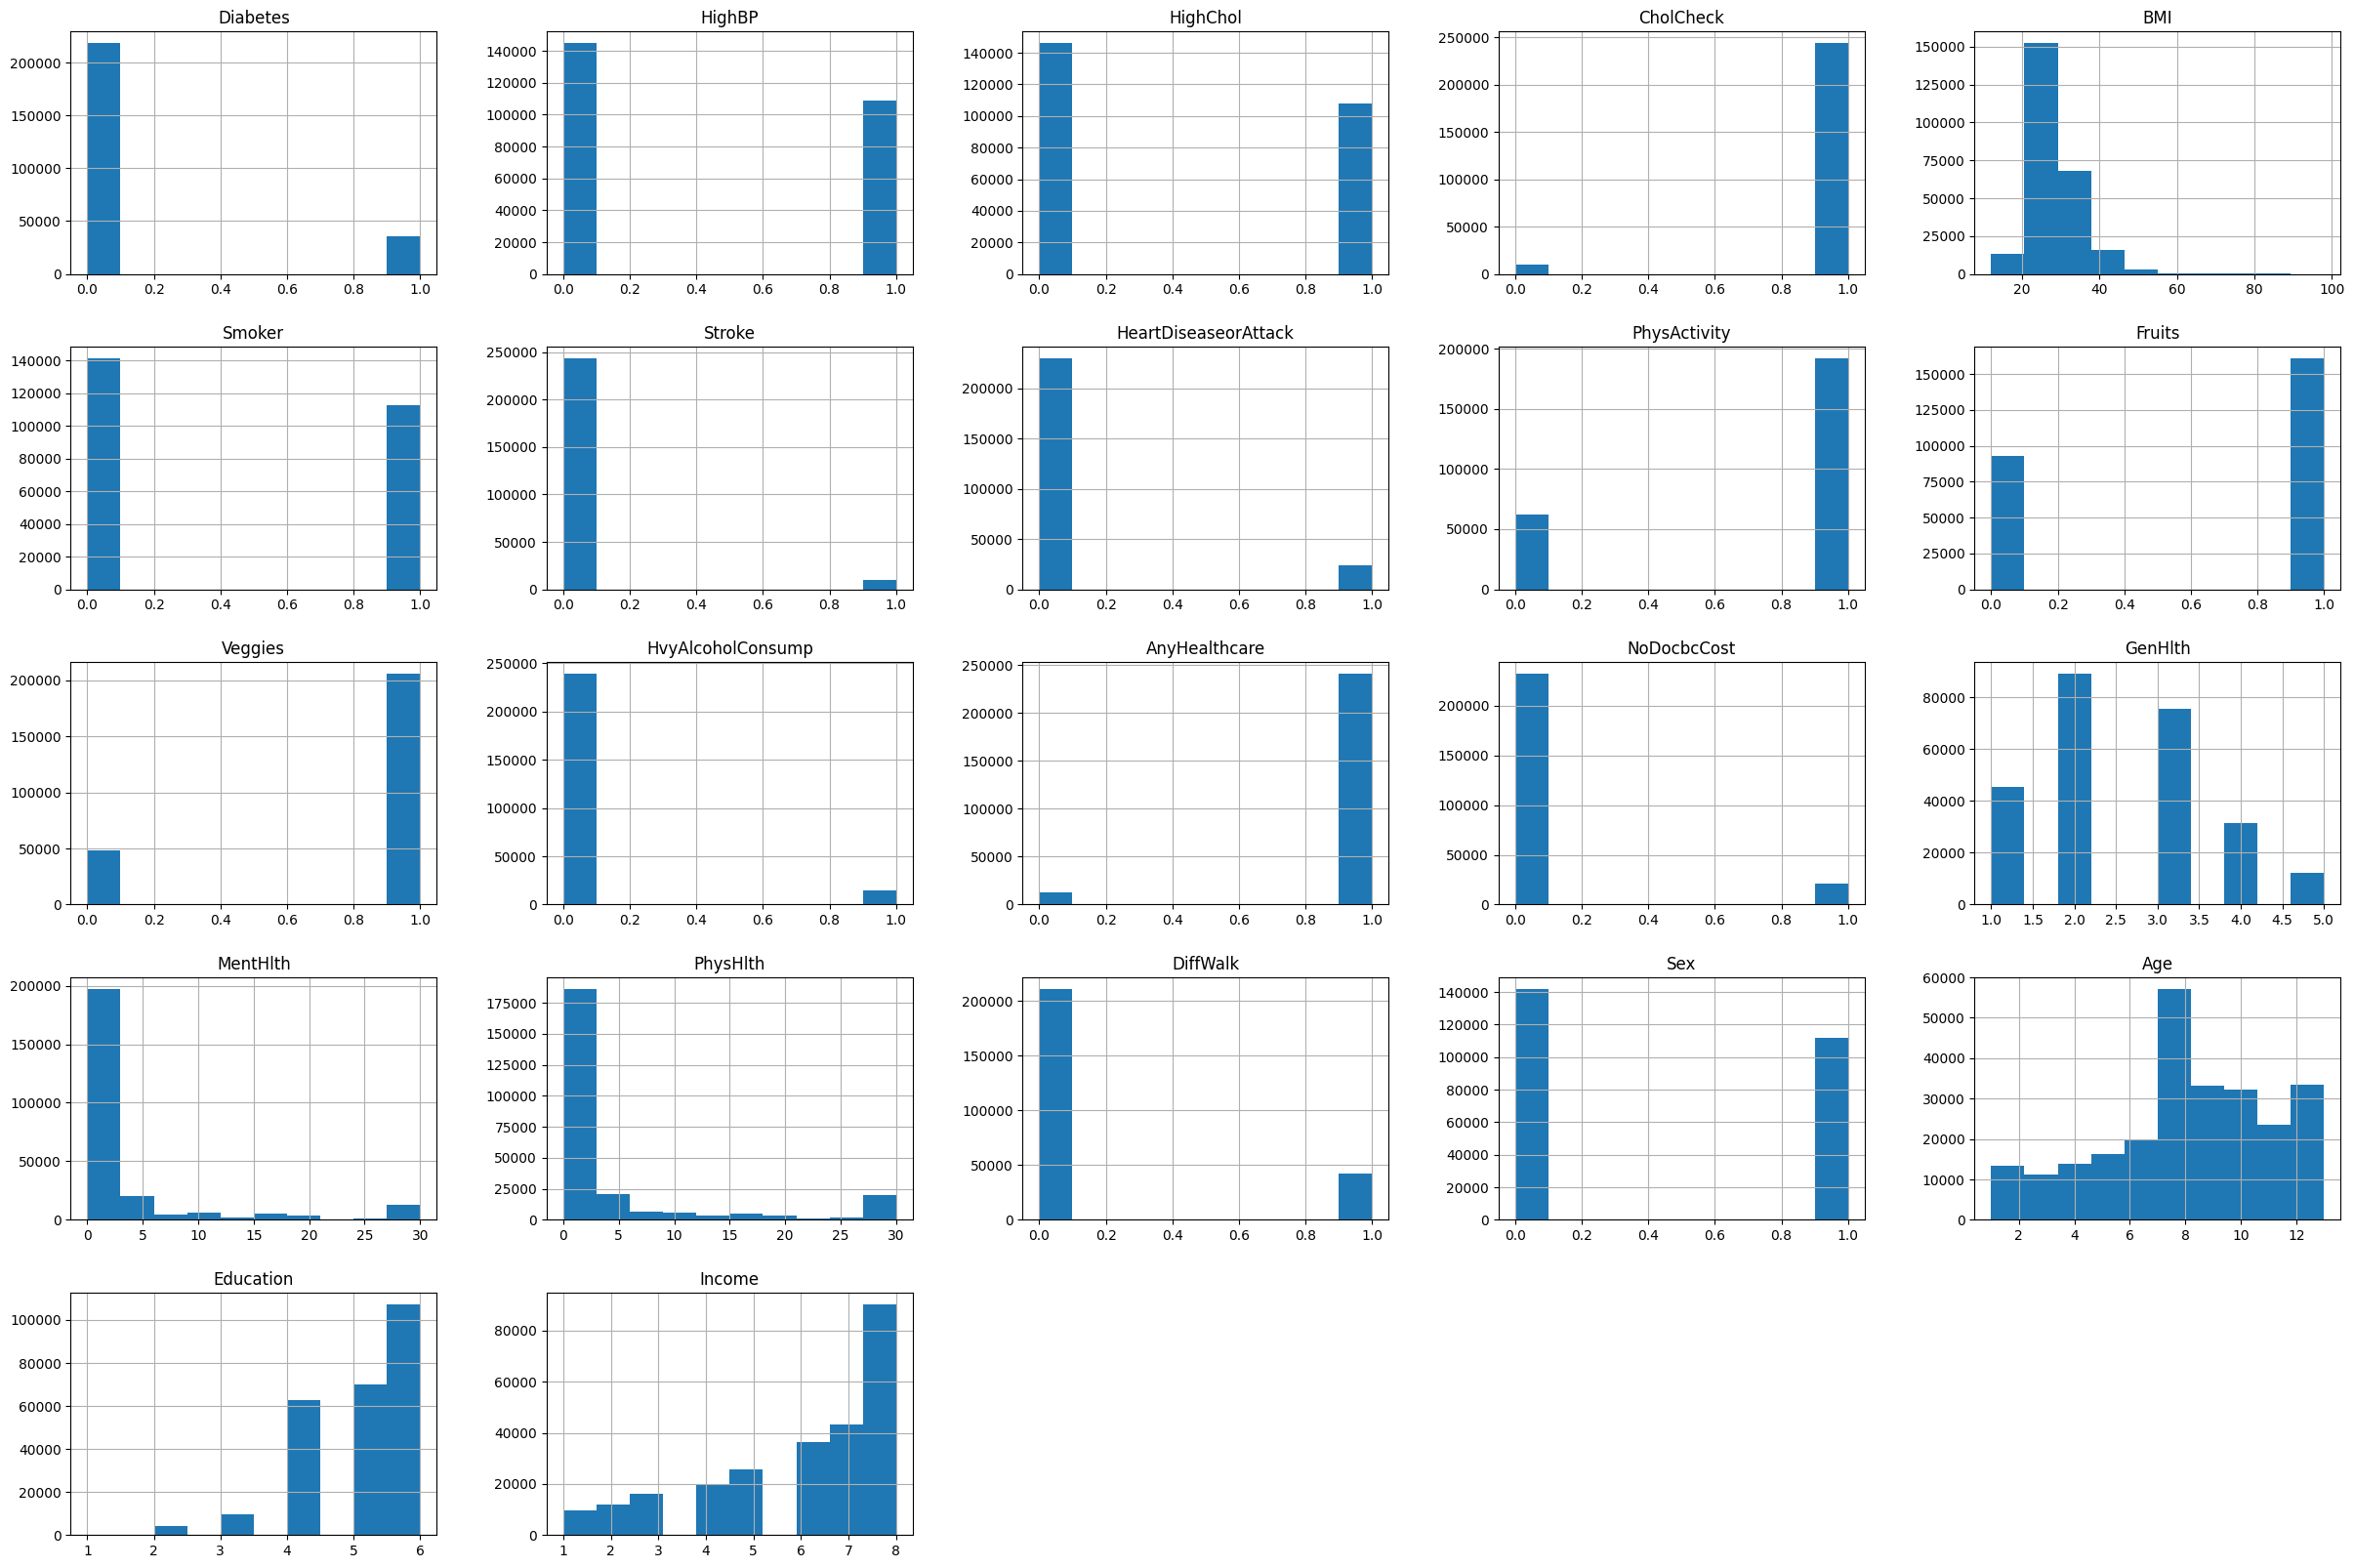

In [60]:
# value count of the dependent columns and the 21 independent columns
df.hist(figsize=(30,20));

When looking at the individual plots, it is noticeable that our dataset contains only continuous or binary columns.
Continuous values are those that take a wide range of values within a certain interval. Binary variables are a subset of the continuous variables because they can only take the values 0 and 1. 
In total, fourteen of the independent variables can be assigned to the binary variables and seven to the continuous variables.

In [ ]:
# plot of the dependent variable 
df["Diabetes"].plot(kind= "hist", bins = 10)
plt.xticks([0, 1])
plt.xlabel('0 = No Diabetes | 1 = Diabetes')
plt.ylabel('# of occurences in the Dataset')
plt.title('Dependent Variable: Diabetes')

In [ ]:
# Printing the absolute numbers of 0 and 1 of the diabetes column
print(df["Diabetes"].value_counts())

We can see that our dependent variable "diabetes" can be classified as a binary variable. A 0 means that the person does not have diabetes and a 1 means that the person has diabetes. It is also noticable that the number of diabetics and non-diabetics in our dataset is very different. While there are 194,377 persons (84.70%) without a diabetic disease, there are only 35097 persons (15.29%) with such a disease. Nevertheless, it can be concluded that because of the large amount of data, can proceed with the studies on our dataset without making any further adjustments.

In [ ]:
# checking gender distribution for people without diabetes
df_no = df[df['Diabetes'] == 0]
ax1 = sns.countplot(data=df_no, x='Sex')
ax1.set(title='Gender distribution for non-diabetics')
ax1.set_xticklabels(['Female', 'Male'])

In [ ]:
# checking gender distribution for people without diabetes
df_yes = df[df['Diabetes'] == 1]
ax2 = sns.countplot(data=df_yes, x='Sex')
ax2.set(title='Gender distribution for diabetics')
ax2.set_xticklabels(['Female', 'Male'])

When comparing both plots, it is noticeable that the relative distribution of men and women in the groups of diabetics and non-diabetics is constant. Furthermore, it can be seen that there are relatively more women than men in both the group of diabetics and the group of non-diabetics.

In [ ]:
# checking age distribution for people with diabetes
yes = sns.countplot(data=df_yes, x='Age')
yes.set(title= 'Age distribution for diabetics')
yes.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 45)

In [ ]:
# checking age distribution for people without diabetes
no = sns.countplot(data=df_no, x='Age')
no.set(title= 'Age distribution for non-diabetics')
no.set_xticklabels(['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '>80'], rotation = 45)

When looking at the plot of the age distribution of diabetics, it is noticeable that the data set has a right-skew. This means that there are significantly more diabetics >40 years of age than diabetics <40 years of age in the data set. This could be due to the fact that the probability of developing diabetes increases significantly with age, which is also reflected in the data set. When comparing the plot of diabetics with that of nondiabetics, it is noticeable that there is a much higher relative number of <40s in the nondiabetics and that the different ages are more balanced overall. Nevertheless, the shape of the age distribution of the diabetics is similar to that of the nondiabetics. Therefore, the two groups can be compared without having to make further adjustments.

## 4. Statistical Analysis and Results

In the following we are taking a closer look at our data using statistical analysis. The aim of examining statistical analysis is to get insights from data and to provide a structured approach to understanding and interpreting complex information. By employing various statistical methods and techniques, statistical analysis helps to uncover relationships and draw conclusions from data.

### 4.1 Unbalanced Dataset
#### 4.1.1 Correlation Analysis

In a comprehensive statistical analysis, we have explored the correlations between various factors and the presence of diabetes, showing possible influencing factors of an individual's risk of developing this chronic health condition.
Therefore, we create a correlation matrix to better understand the correlations between the several aspects of the dataset. Moreover, the heatmap displays the strength and direction of the linear relationships between variables. The correlation ranges from -1 to 1. Whereas 1 represents a perfect positive correlation, 0 means there exists no relation and -1 signifies a perfect negative correlation between the specific variables.  


Text(0.5, 1.0, 'Correlation Heatmap')

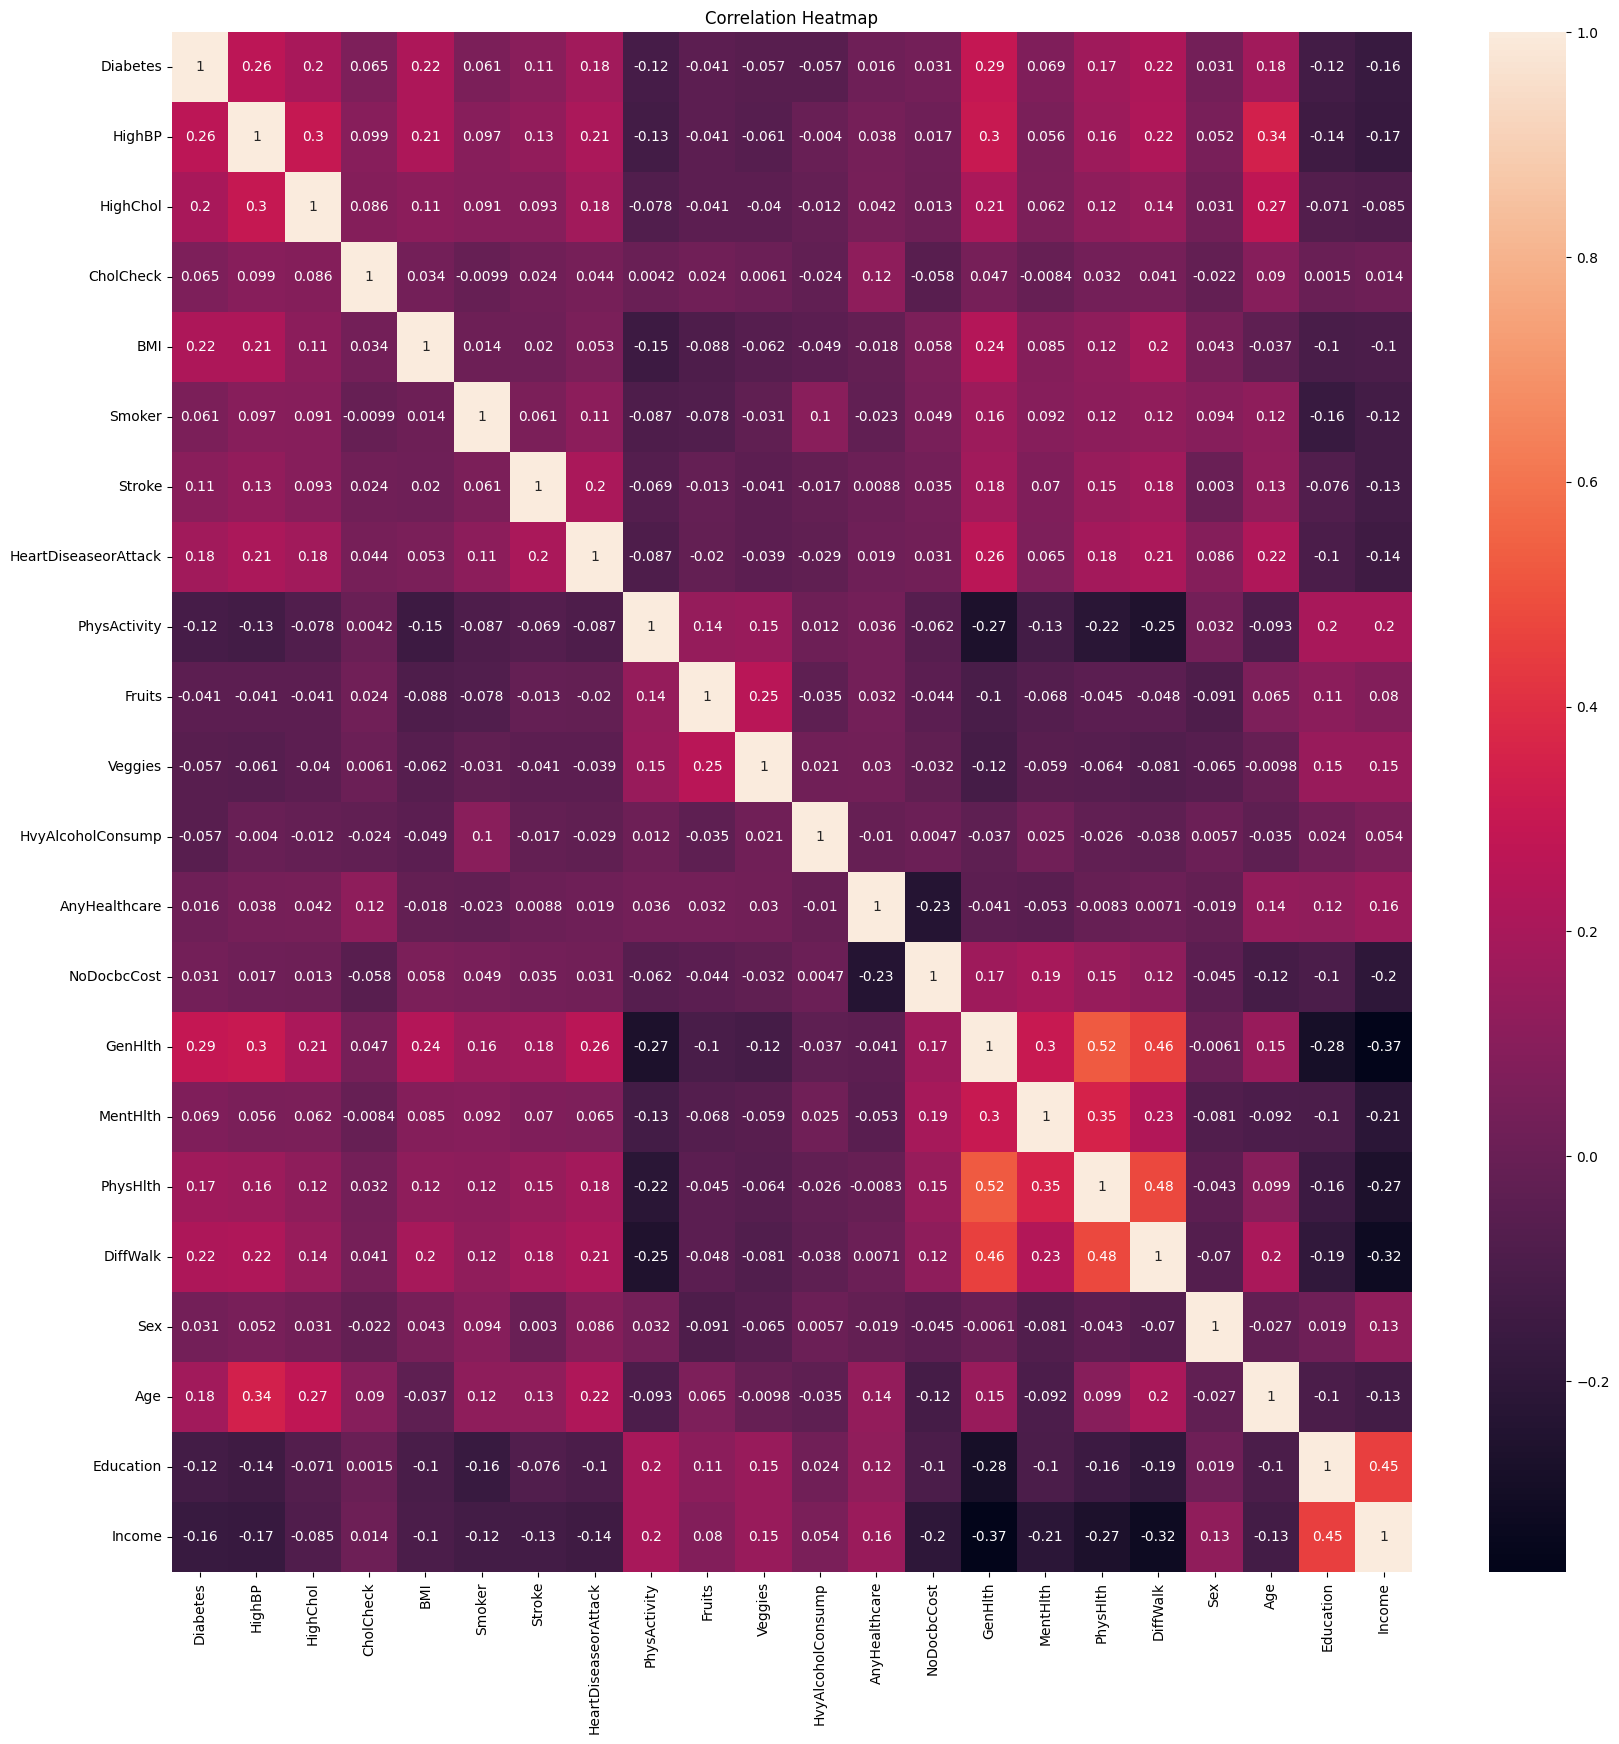

In [61]:
#Heatmap of correlation

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot=True).set_title('Correlation Heatmap')

Consequently, the primary focus is on analyzing the correlations between the dependent variable 'Diabetes' and other variables, such as 'GenHlth.' This analysis aims to better understand the factors influencing the likelihood of having diabetes.

In [62]:
#checking abs correlation between columns of dataset df
corr_matrix = df.corr()
corr_matrix['Diabetes'].sort_values(ascending=False)

Diabetes                1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
Income                  0.224449
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Education               0.170481
PhysActivity            0.158666
Stroke                  0.125427
CholCheck               0.115382
HvyAlcoholConsump       0.094853
MentHlth                0.087029
Smoker                  0.085999
Veggies                 0.079293
Fruits                  0.054077
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Name: Diabetes, dtype: float64

<Axes: >

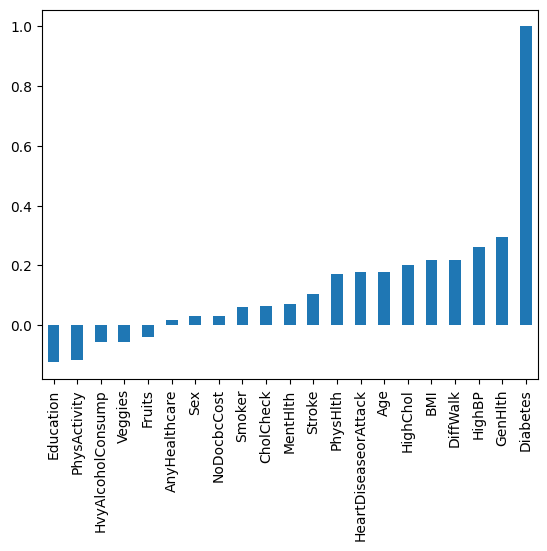

In [63]:
#Plot correlation between the variables and Diabetes
df.corr()['Diabetes'][:-1].sort_values().plot(kind='bar')

The bar plot displayed above visualizes the results of the correlation analysis, providing a clear depiction of the strength of the relationships between specific variables and diabetes. These influences can be categorized into two distinct groups, the positive and negative influence on diabetes. The first group, including 'Education,' 'PhysActivity,' 'HvyAlcoholConsumption,' 'Veggies,' and 'Fruits,' exhibits negative correlations with diabetes, indicating a potential protective effect. 

- Consumption of Fruits (Fruits) (-0.040779): A negative correlation between fruit consumption and diabetes suggests that a diet rich in fruits may be associated with a lower risk.

- Consumption of Vegetables (Veggies) (-0.056584): Similarly, vegetable consumption displays a negative correlation with diabetes, though the correlation is not particularly strong.

- Heavy Alcohol Consumption (HvyAlcoholConsump) (-0.057056): Heavy alcohol consumption, intriguingly, exhibits a negative correlation with diabetes. While this negative correlation is relatively weak, it suggests that heavy alcohol consumption might be associated with a reduced risk of diabetes, though this relationship requires further exploration.

- Physical Activity (-0.118133): Physical activity demonstrates a negative correlation with diabetes, indicating that a more active lifestyle may reduce the risk of developing diabetes.

- Education (-0.124456): The correlation of -0.124456 indicates that education exhibits a negative correlation with diabetes. This implies that higher levels of education may be associated with a lower risk of diabetes.

In contrast, the second group comprises all remaining variables, such as 'Age,' 'Sex,' and 'Smoker,' which show positive correlations, suggesting an increased risk of developing diabetes. 


- Availability of Any Healthcare (AnyHealthcare) (0.016255): Access to any form of healthcare services displays a weak positive correlation with diabetes.

- Sex (0.031430): Gender, represented here as 'Sex,' shows a weak positive correlation of 0.031430 with diabetes, implying that there may be gender-based differences in diabetes risk.

- No access to Healthcare because of the Costs (NoDocbcCost) (0.031433): Having no access to healthcare services because of its financial barriers exhibits a weak positive correlation with diabetes, indicating that limited access to healthcare may be a risk factor.

- Smoking (0.060789): Smoking is positively correlated with diabetes, although the correlation of 0.060789 is not particularly strong. This underscores the importance of not smoking for diabetes prevention.

- Cholesterol Checks (CholCheck) (0.064761): Regular cholesterol checks have a weak positive correlation with diabetes, indicating that individuals who do not monitor their cholesterol levels may be at slightly higher risk.

- Mental Health (MentHlth) (0.069315): Mental health also exhibits a positive correlation with diabetes, suggesting that individuals with poorer mental health may be at a slightly higher risk of 0.069315.

- Stroke (0.105816): Stroke, while positively correlated with diabetes, has a weaker association of 0.105816. Meaning that having had a stroke increases the likelihood of getting diabetes slightly.

- Income (0.163919): Income levels are positively correlated with diabetes, implying that higher income may be associated with a reduced risk of diabetes.

- Physical Health (PhysHlth) (0.171337): An individual's physical health exhibits a positive correlation with diabetes. This suggests that individuals with poorer physical health may be at a higher risk of developing diabetes.

- History of Heart Disease or Heart Attack (HeartDiseaseorAttack) (0.177282): A history of heart disease or heart attacks shares a similar level of positive correlation with diabetes, indicating that these conditions may have common risk factors.

- Age (0.177442): Age shows a significant positive correlation with diabetes, aligning with the well-established understanding that diabetes risk increases with age.

- High Cholesterol (HighChol) (0.200276): High cholesterol levels are positively correlated with diabetes, emphasizing the importance of cholesterol management for diabetes prevention.

- Body Mass Index (BMI) (0.216843): Body Mass Index, a measure of body fat, is also significantly positively correlated with diabetes. Higher BMI values are commonly linked to an increased risk of diabetes.

- Difficulty in Walking (DiffWalk) (0.218344): Difficulty in walking, often associated with mobility issues, exhibits a moderate positive correlation with diabetes. This implies that mobility challenges may contribute to the risk of diabetes.

- High Blood Pressure (HighBP) (0.263129): High blood pressure, or hypertension, displays a strong positive correlation with diabetes, indicating that individuals with hypertension may be more predisposed to diabetes.

- General Health (GenHlth) (0.293569): A significant positive correlation exists between an individual's perception of their general health and the likelihood of having diabetes. This suggests that individuals who rate their general health lower may be at an elevated risk of diabetes.



#### 4.1.2 Logistic Regression


The next step in the statistical analysis is to conduct a logistic regression.The aim of logistic regression is to model the relationship between a binary dependent variable 'Diabetes' and one or more independent variables. It provides a valuable tool for predicting the probability of having diabetes, making it an essential step in statistical analysis. 

To be able to analyze our data further we imported essential packages from sklearn.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

Next, the dataset is splitted into the features and target variable.

In [65]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

And in the following further divided into a train and test set using a fixed random state in order to be able to reciprocate results. Wherby the training set comprises 80 % of the overall data and the test set 20%. 

The utilization of both training and test datasets in statistical analysis and predictive modeling is important. For instance, it enables the evaluation of the model's performance. The training dataset is employed to build the model, while the test dataset is used to assess how well the model generalizes to new, unseen data. This evaluation is essential for understanding the model's real-world effectiveness.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To be able to better elaborate on the given data we trained a logistic regression model with a maximum of 1000 iterations.

In [67]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Predictions on test data

In our next step  we are predicting the test results. 


In [68]:
# Prediciting the test results
y_pred = logreg.predict(X_test)

And in the following we are evaluating the model based on its accuracy, the confusion matrix and the classification report.

In [69]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix, class_report
#print accuracy and display metrics in sentences
print(f'Test Accuracy: {accuracy}'"\n")
print(f'Confusion Matrix: \n{conf_matrix}'"\n")
print(f'Classification Report: \n{class_report}'"\n")


Test Accuracy: 0.8658152002522863

Confusion Matrix: 
[[42770   969]
 [ 5839  1158]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.54      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736




The results of the conducted analysis show a test accuracy of 0.865815. Highlighting an overall good test accuracy of 86.58 %. 

The classification report aims to offer a detailed assessment of a statisticals model's performance, with a focus on precision, recall, and F1-score for each binary class. In this case having diabetes (1) or not (0). 
The report shows that class 0 (not having diabetes) has high precision (0.88) and recall (0.98), indicating accurate predictions. However, class 1 (having diabetes) has lower precision (0.54) and recall (0.17), showing that the model struggles to correctly identify this class.

In the following the confusion matrix for the test set is visualized to underline its results aiming for a better understanding of the data.

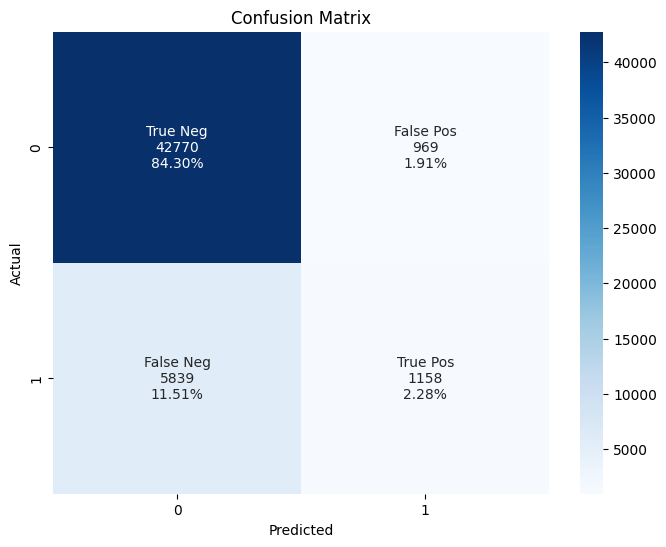

In [70]:
# visualize confusion matrix for test and train set

# plt.figure(figsize=(8,6))
# sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix');

plt.figure(figsize=(8,6))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix');

A confusion matrix is a powerful tool that goes beyond just evaluating the accuracy of a classification model. It's designed to provide a more nuanced understanding of a model's performance by breaking down the predictions into four key categories: true positives, true negatives, false positives, and false negatives. These categories hold the key to understanding the model's precision and reliability, especially when we're dealing with a condition as critical as diabetes.

True positive represents the number of individuals correctly identified as having diabetes. In our dataset, this means that 1158 people with diabetes were accurately recognized by the model. This is a crucial aspect, especially when it comes to making medical diagnoses. The number of subjects correctly predicted as negative is called the true negatives. Therefore, 42770 individuals are correctly identifed to not having diabetes. Consequently, the sample correctly identifies 2.28 % to have diabetes and 84.30 % to not have the disease.  

False positives are the instances where the model incorrectly predicted a positive outcome. In our context, it means that 969 individuals were mistakenly labeled as having diabetes when they don't have it. This kind of error is known as a Type I error and is something we aim to minimize because it can lead to unnecessary treatments.

Lastly, the number of false negatives in a sample represents the instances where the model incorrectly predicted a negative outcome, failing to identify individuals who do have diabetes. This is a Type II error. In our data, this amounts to 5839 individuals who have diabetes but were not detected by the model. Missing out on these cases is a serious matter. In total 1.91 % belong to the Type I error and 11.51 % to the Type II error.

In a healthcare setting, understanding these types of errors is paramount, as it can have a significant impact on patient outcomes. We need to strike a balance between minimizing Type I and Type II errors. Reducing Type I errors is vital to prevent unnecessary stress and treatments, while minimizing Type II errors is crucial to ensure individuals with diabetes receive the care they need.



#### Predictions on training data

As a second step we are predicting the results of the training data, which comprises 80 % of the overall data.

In [71]:
# Predict the training results
y_pred_train = logreg.predict(X_train)

Therefore, we are again evaluating the training model based on its accuracy, the classification report and the confusion matrix. 


In [72]:
# Evaluating the training model
accuracy_train = accuracy_score(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# display metrics in sentences for training set
print(f'Train Accuracy: {accuracy_train}'"\n")
print(f'Confusion Matrix: \n{conf_matrix_train}'"\n")
print(f'Classification Report: \n{class_report_train}'"\n")

Train Accuracy: 0.8630311810154525

Confusion Matrix: 
[[170776   3819]
 [ 23978   4371]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.98      0.92    174595
           1       0.53      0.15      0.24     28349

    accuracy                           0.86    202944
   macro avg       0.71      0.57      0.58    202944
weighted avg       0.83      0.86      0.83    202944




As illustrated above the accuracy of the training model is 0.86303. 
The classification report demonstrates that for class 0 representing not having diabetes, the model exhibits a strong precision of 0.88 and a recall of 0.98, resulting in a high F1-score of 0.92. This suggests that the model accurately identifies not having the disease. However, for class 1, representing having diabetes, precision (0.53) and recall (0.15) are lower, leading to a lower F1-score of 0.24. This indicates challenges in correctly identifying individuals to have diabetes. Overall, the model demonstrates an accuracy of 0.86, which is a solid performance, but the report emphasizes the need to address the imbalanced class distribution for class 1 to improve model performance further.

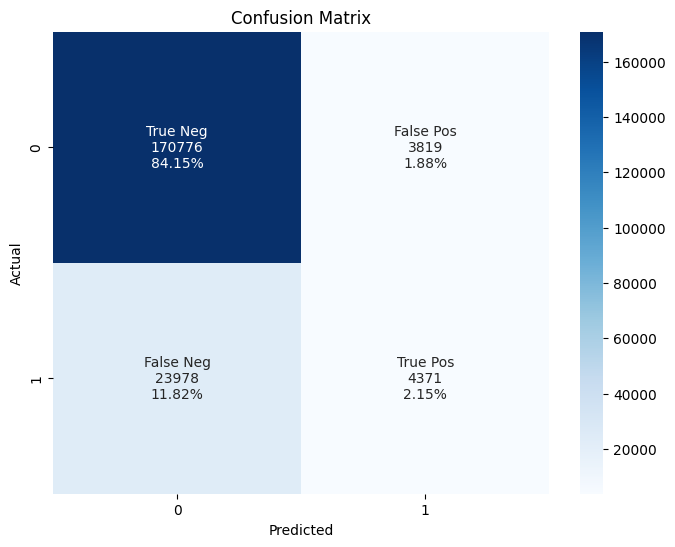

In [73]:
# visualize confusion matrix
# plt.figure(figsize=(8,6))
# sns.heatmap(conf_matrix_train, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix');

plt.figure(figsize=(8,6))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_train.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_train.flatten()/np.sum(conf_matrix_train)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_train, annot=labels, fmt='', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix');

The confusion matrix of the test set shows a true positive value of 4371 meaning that 2.15 % of all instances are correctly predicted to have diabetes. The number of true negatives amounts to 170776. Consequently, the sample correctly identifies 84.15 % of all subjects to not having diabetes.
The number of individuals that are incorrectly predicted to have diabetes amounts to 3819 . Therefore, 1.88 %  of the overall sample belong to the Type I error and are predicted to have diabetes without actually having it. The individualls belonging to the Type II error amount to 11.82 %. Meaning that the sample fails to identify 23978 individuals to have the disease diabetes.

### 4.2 Balanced Dataset

In the following we are using a balanced dataset.

In [74]:
#Loading the dataset
dfn = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
dfn.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


For data preparation, we followed the same procedures as we did with the unbalanced dataset. It's worth noting that the other variables remain unchanged, so the descriptions and characteristics of those variables continue to apply. We conduct further analyzis with the balanced dataset of 35346 subjects in each condition.  

In [ ]:
# describing the dataframe
dfn.describe().T

In [75]:
# convert all columns to ints   
dfn = dfn.astype(int)

# rename Diabtes_012 to Diabetes
dfn.rename(columns={'Diabetes_binary': 'Diabetes'}, inplace=True)

#value count
dfn.Diabetes.value_counts()

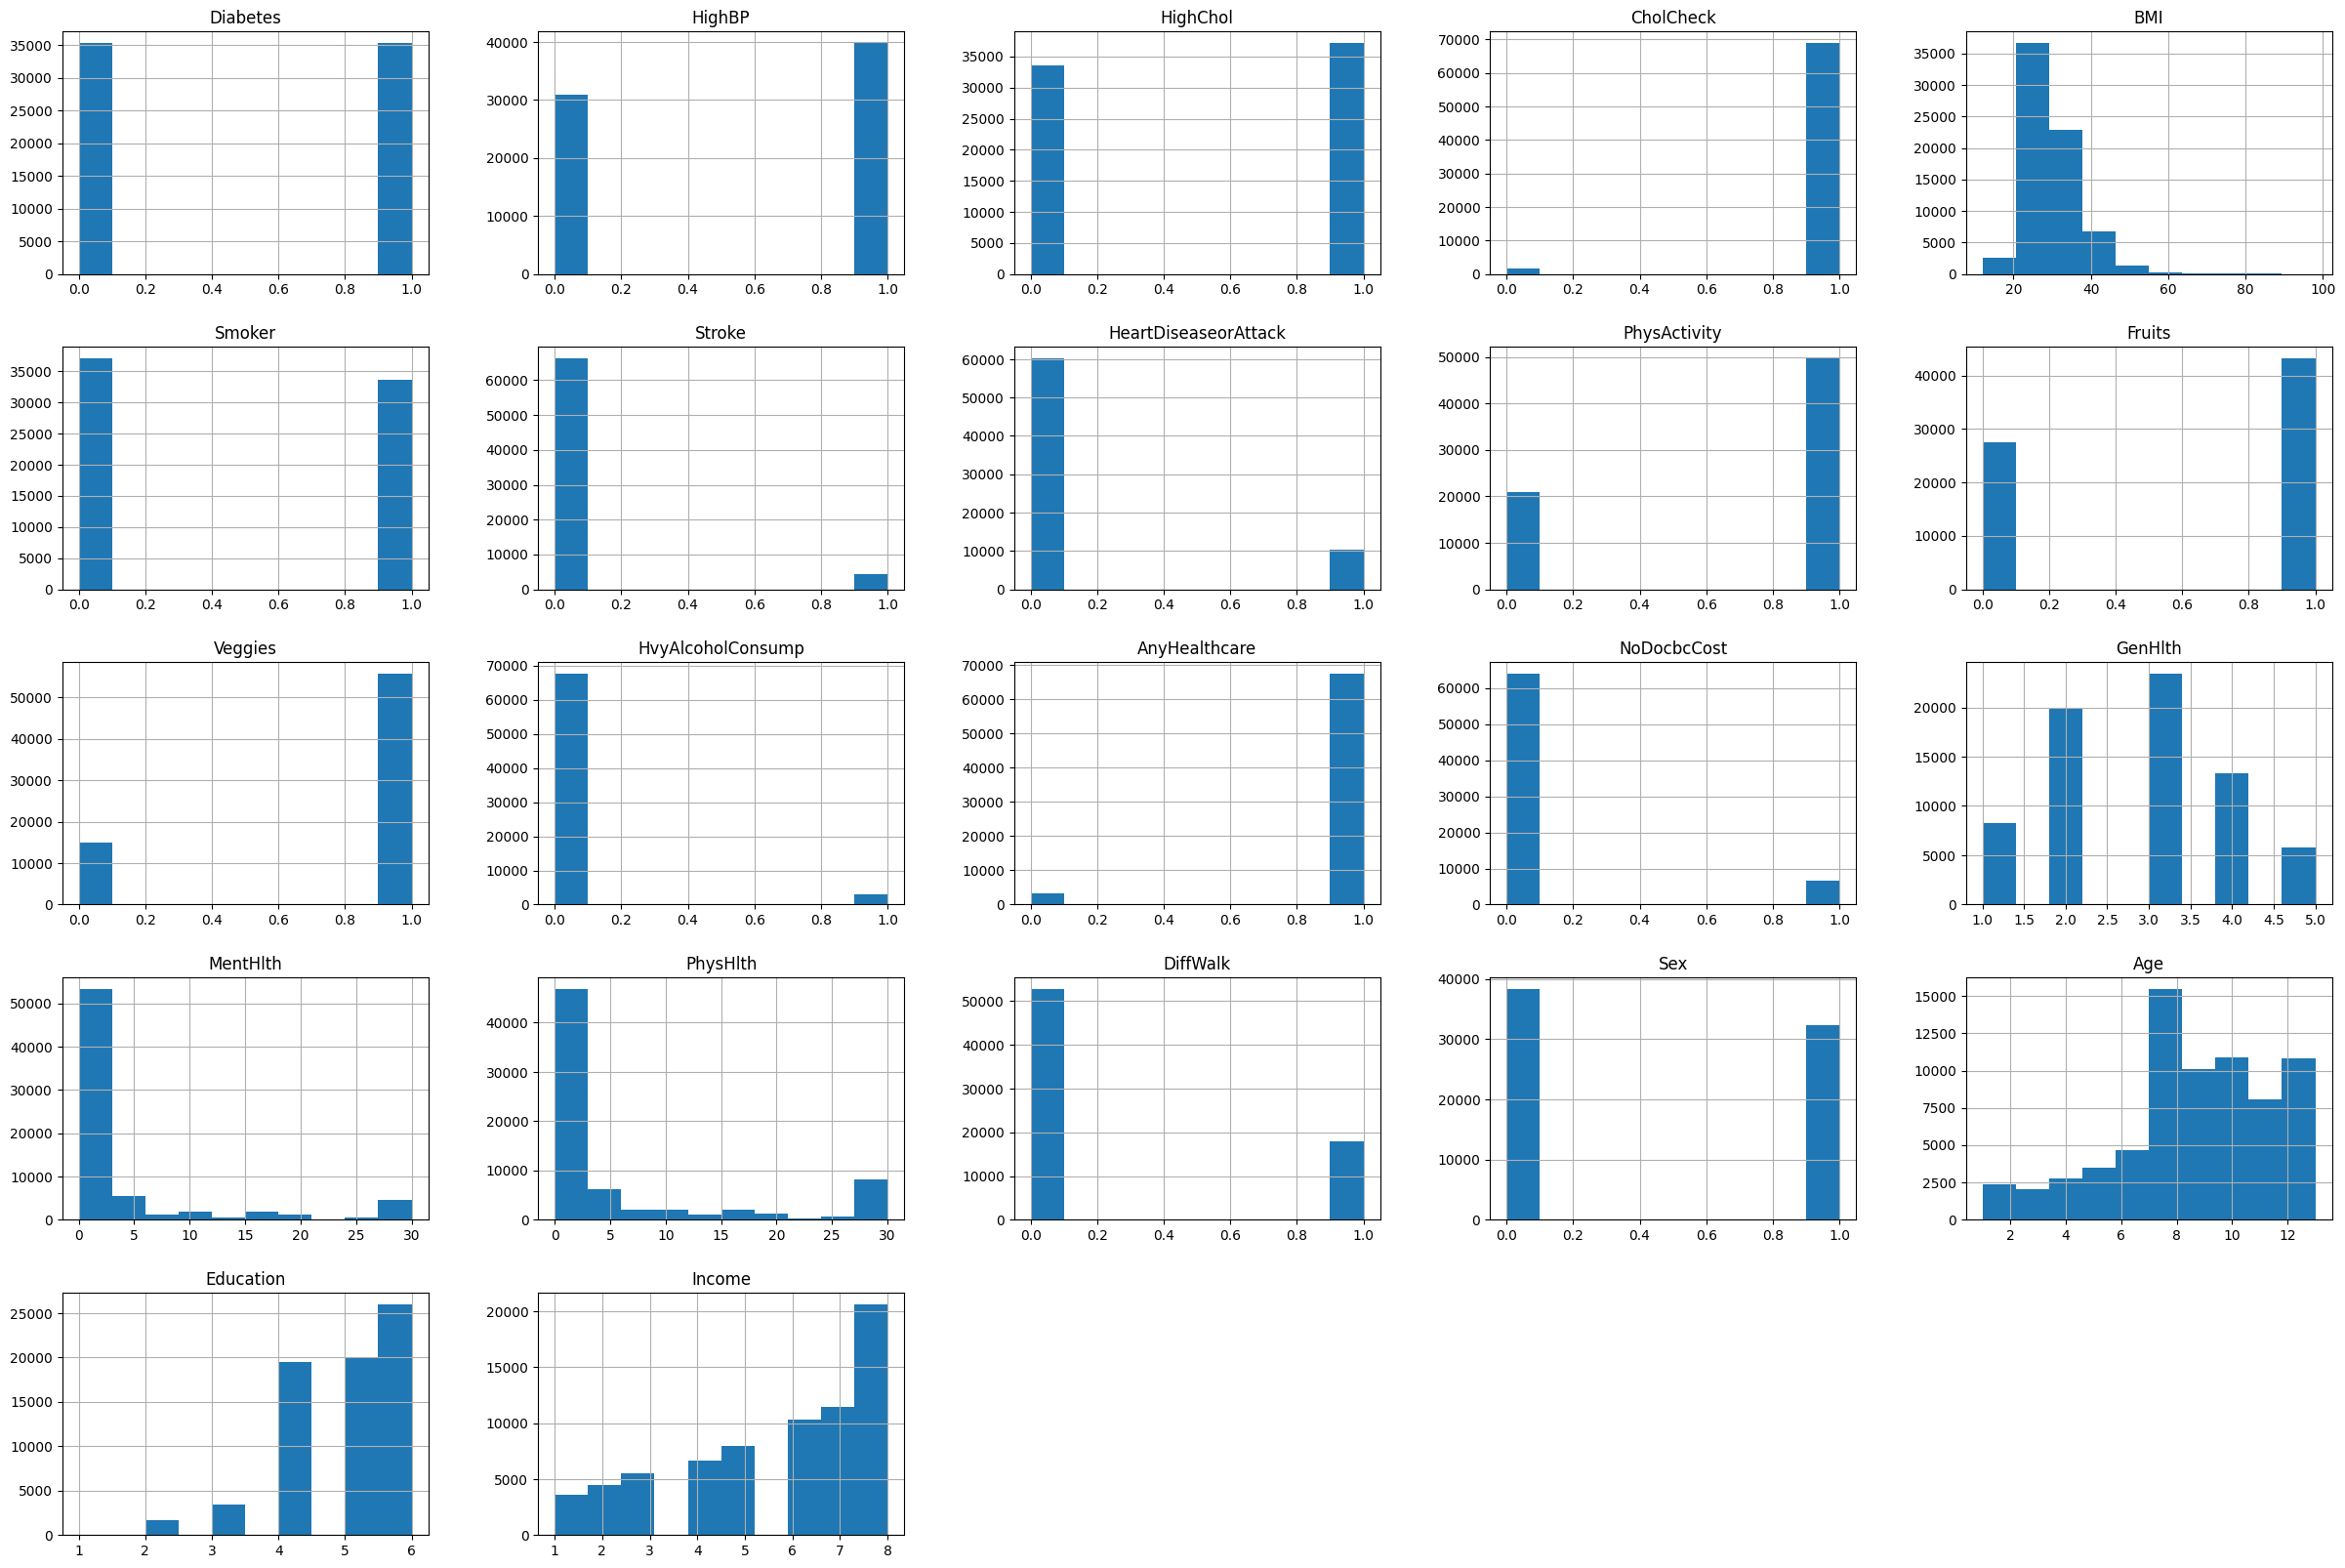

In [78]:
#Analyzing the balanced dataset
dfn.hist(figsize=(30,20));

Describe some variables where distrubution is very different -> connection to correlation

#### 4.2.1 Correlation Analysis

In our  statistical analysis, we explored possible correlations between various factors and having diabetes. This exploration allowed us to uncover potential influencers that contribute to an individual's tendency to this health condition. Using a correlation matrix and a heatmap, we visually illustrate the relationships within our dataset, providing clear insights into these connections.


In [ ]:
#Heatmap of correlation

plt.figure(figsize = (20,20))
sns.heatmap(dfn.corr(),annot=True).set_title('Correlation Heatmap')

In the following we are checking for correlations between the columns of the dataset and having diabetes. 

In [77]:
corr_matrix = dfn.corr()
corr_matrix['Diabetes'].sort_values(ascending=False)

Diabetes                1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Stroke                  0.125427
CholCheck               0.115382
MentHlth                0.087029
Smoker                  0.085999
Sex                     0.044413
NoDocbcCost             0.040977
AnyHealthcare           0.023191
Fruits                 -0.054077
Veggies                -0.079293
HvyAlcoholConsump      -0.094853
PhysActivity           -0.158666
Education              -0.170481
Income                 -0.224449
Name: Diabetes, dtype: float64

Text(0.5, 1.0, 'Correlation Heatmap')

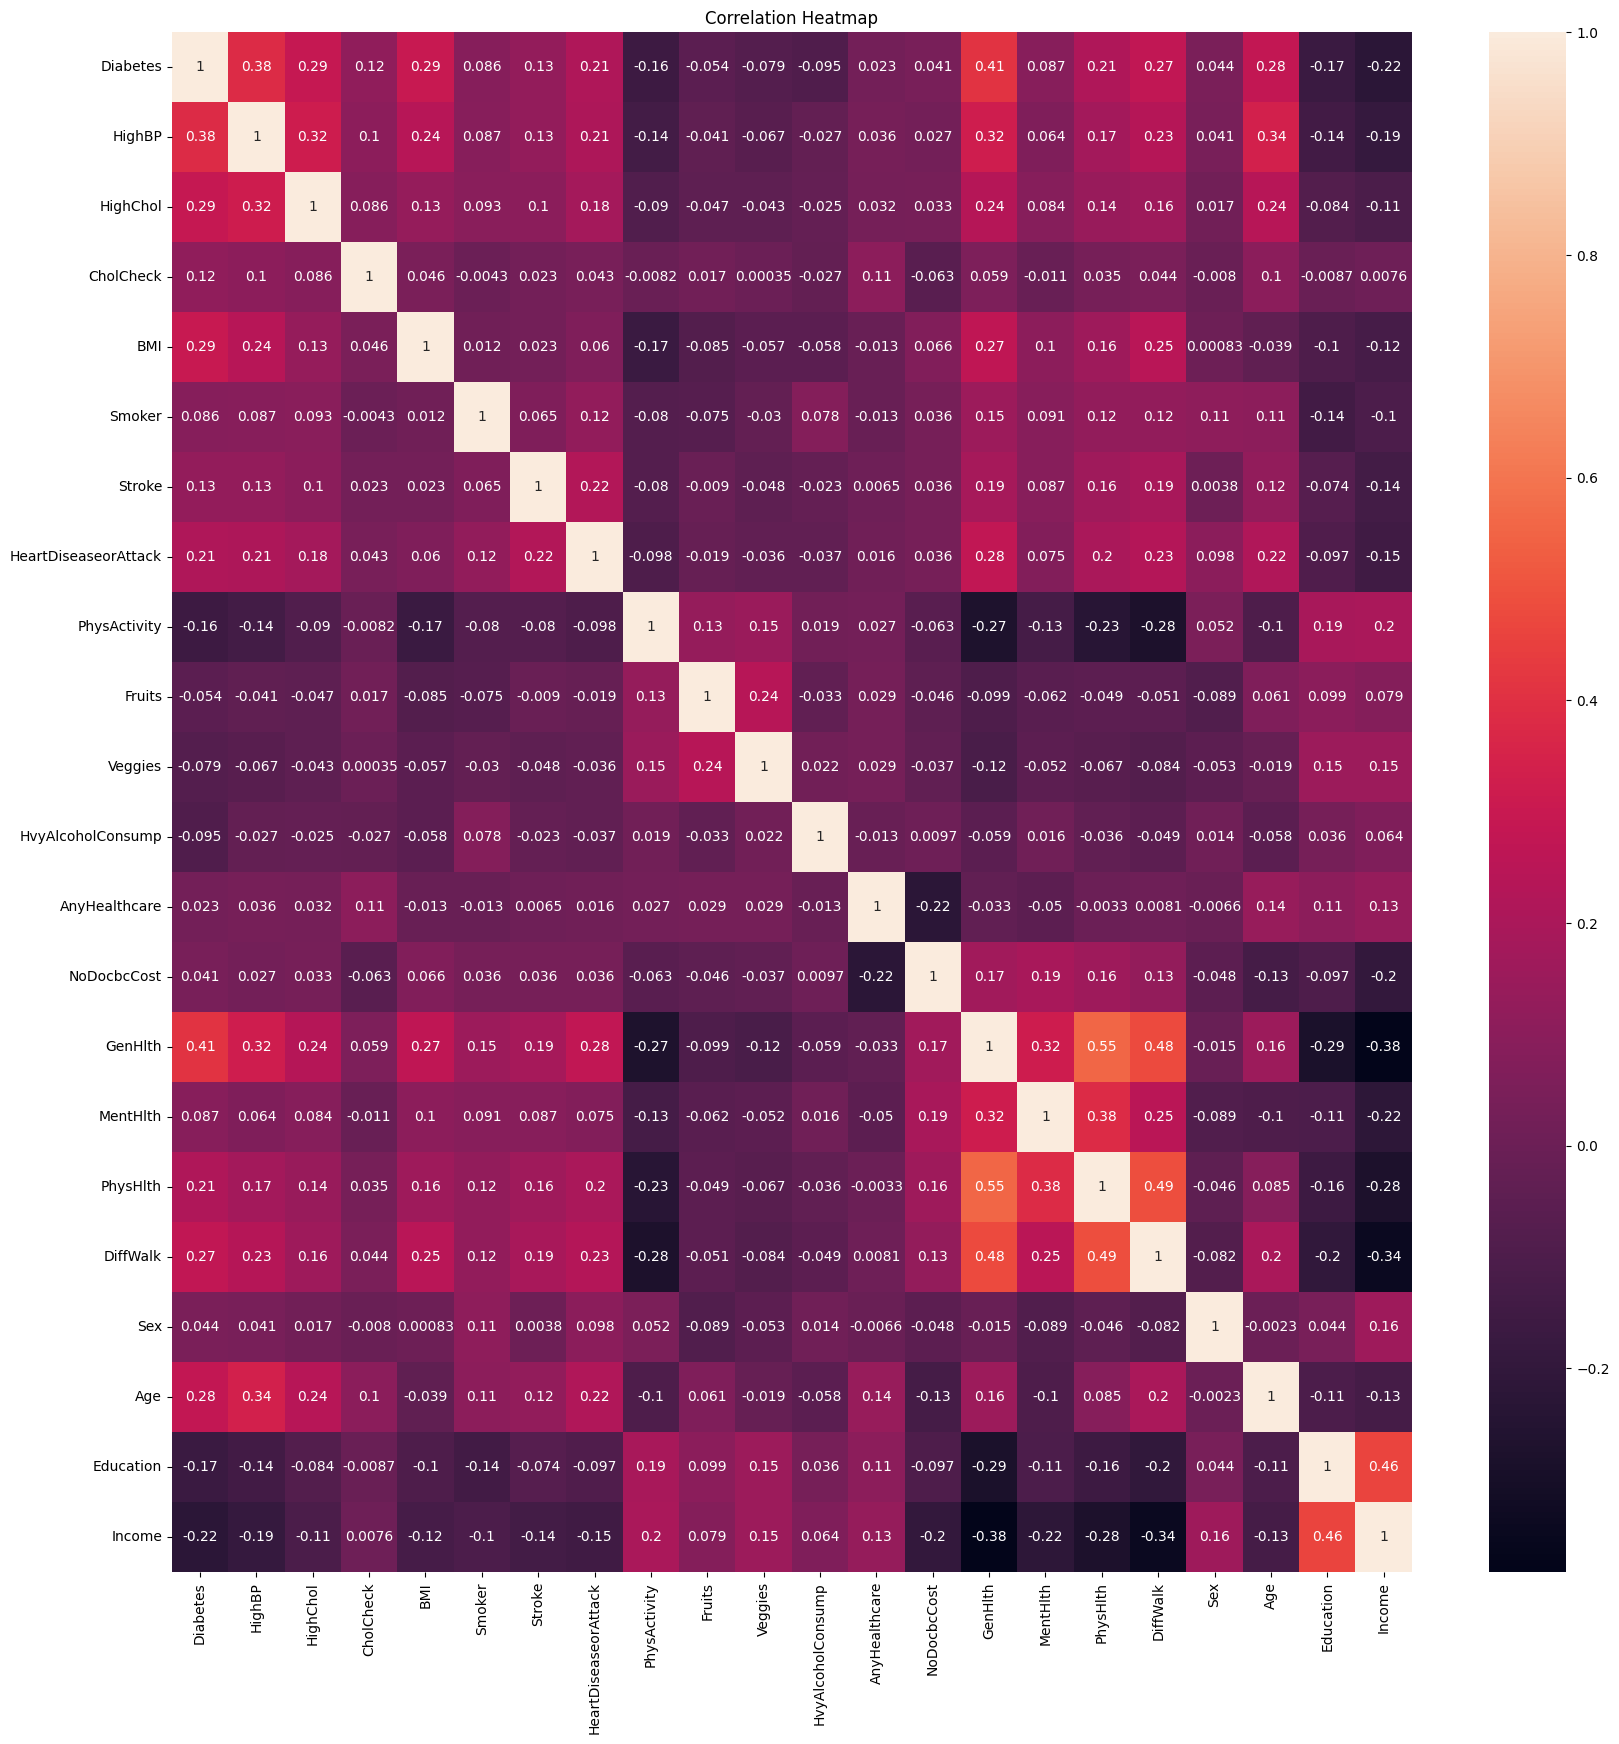

In [80]:
#Heatmap of correlation

plt.figure(figsize = (20,20))
sns.heatmap(dfn.corr(),annot=True).set_title('Correlation Heatmap')

Moreover, the plot illustrates the correlations between the variables and diabetes. Showing that 'Education, 'PhysActivity', 'HvyAlcoholConsump', 'Veggies' and 'Fruits' have a negative correlation with diabetes. The remaining variables, like 'GenHlth', 'HighBP' and 'HeartDiseaseorAttack' have a positive one. 

<Axes: >

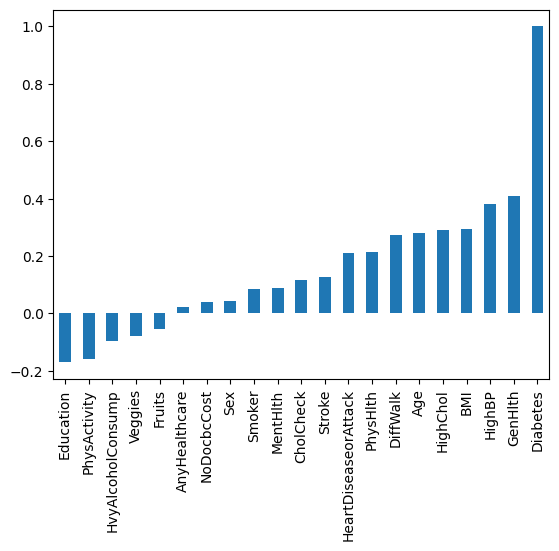

In [81]:
#Plot correlation between the variables and Diabetes

dfn.corr()['Diabetes'][:-1].sort_values().plot(kind='bar')

Comparing the results from the correlation plot from the unbalanced dataset to the balanced one shows no changes.

### 4.2.2 Logistic Regression


Subsequently, the dataset is partitioned into the following two components: the features and the target variable. These components are then further segmented into a training set and a test set, with the a consistent random state to ensure result reproducibility. Notably, the training set encompasses 80% of the complete dataset, while the test set constitutes the remaining 20%.

In [82]:
# Splitting dataset in features and target variable
Xn = dfn.drop('Diabetes', axis=1)
yn = dfn['Diabetes']

#80 training 20 test
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2, random_state=42) 

# Training a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(Xn_train, yn_train)

#### Predictions on test set

First of all we are predicting the rest results in order to examine them in a second step.

In [85]:
# Prediciting the test results
yn_pred = logreg.predict(Xn_test)

To evaluate the predicted results we evaluate the model by its accuracy, the classification report and the confusion matrix. As displayed below the analysis results reveal the effectiveness of our logistic regression model in predicting diabetes. The test accuracy stands at approximately 74.83%, demonstrating the model's ability to make accurate classifications. The classification report provides a more detailed view, indicating a balanced performance with a weighted average F1-score of 0.75. For class 0 (not having diabetes), the model shows a precision of 0.76 and a recall of 0.73, while for class 1 (having diabetes), the precision is 0.74 and the recall is 0.77. These metrics collectively emphasize the model's capacity to discern between the two classes and its potential to assist in diabetes prediction. 

In [86]:
# Evaluating the model
accuracy = accuracy_score(yn_test, yn_pred)
class_report = classification_report(yn_test, yn_pred)
conf_matrix = confusion_matrix(yn_test, yn_pred)

In [87]:
accuracy, conf_matrix, class_report
#print accuracy and display metrics in sentences
print(f'Test Accuracy: {accuracy}'"\n")
print(f'Classification Report: \n{class_report}'"\n")
print(f'Confusion Matrix: \n{conf_matrix}'"\n")


Test Accuracy: 0.7482848857769291

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      7090
           1       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139


Confusion Matrix: 
[[5155 1935]
 [1624 5425]]



The confusion matrix offers valuable insights into the performance of our classification model. It reveals that the model accurately predicted 5,155 true negatives and 5,425 true positives, reflecting its ability to correctly identify instances that do not have diabetes and those that do. However, there were 1,935 false positives and 1,624 false negatives. These figures signify some degree of misclassification, emphasizing the need for further model refinement.

Overall, the results indicate the model's strong predictive capability with a balanced approach to minimizing both Type I and Type II errors in diabetes classification. Further optimizations may lead to even more precise predictions, with implications for improved healthcare and patient outcomes.

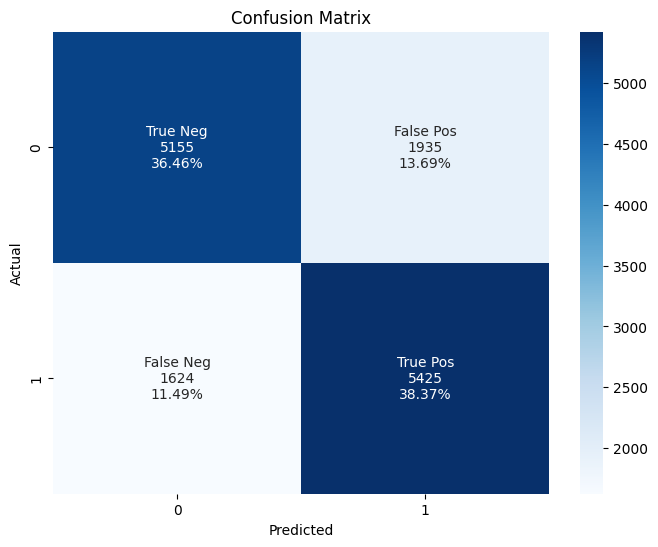

In [88]:
# visualize confusion matrix for test and train set

# plt.figure(figsize=(8,6))
# sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix');

plt.figure(figsize=(8,6))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix');

#### Predictions on training set

Secondly, we are predicting the training results to further examine them. 

In [75]:
# Predict the training results
yn_pred_train = logreg.predict(Xn_train)

The results of the training model are also evaluated based on their accuracy, the classification report and the confusion matrix.

# Add results

In [76]:
# Evaluating the training model
accuracy_train = accuracy_score(yn_train, yn_pred_train)
class_report_train = classification_report(yn_train, yn_pred_train)
conf_matrix_train = confusion_matrix(yn_train, yn_pred_train)

# display metrics in sentences for training set
print(f'Train Accuracy: {accuracy_train}'"\n")
print(f'Classification Report: \n{class_report_train}'"\n")
print(f'Confusion Matrix: \n{conf_matrix_train}'"\n")

Train Accuracy: 0.7480239775078246

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.73      0.74     28256
           1       0.74      0.77      0.75     28297

    accuracy                           0.75     56553
   macro avg       0.75      0.75      0.75     56553
weighted avg       0.75      0.75      0.75     56553


Confusion Matrix: 
[[20565  7691]
 [ 6559 21738]]



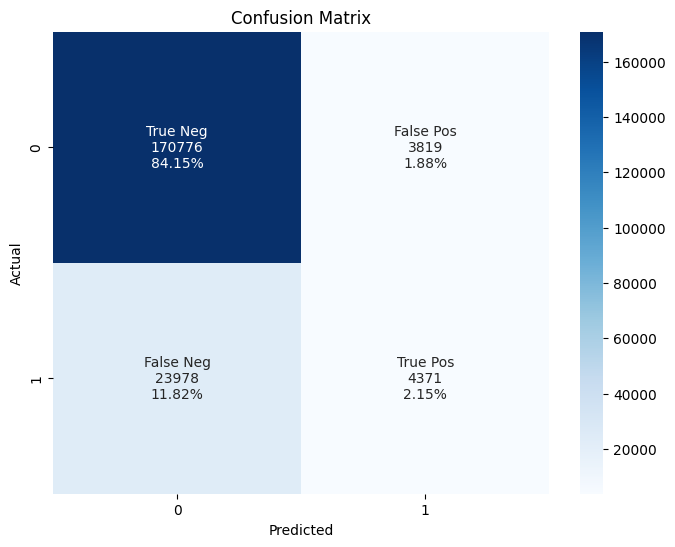

In [91]:
# visualize confusion matrix
# plt.figure(figsize=(8,6))
# sns.heatmap(conf_matrix_train, annot=True, cmap='Blues', fmt='g')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix');

plt.figure(figsize=(8,6))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_train.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_train.flatten()/np.sum(conf_matrix_train)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix_train, annot=labels, fmt='', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix');

##### Code executed

In [92]:
# Code executed